# Annulus different distributions

In [1]:
using Pkg
Pkg.activate("../../env/.")
Pkg.instantiate()

  Activating project at `~/analogous_neural/env`


In [2]:
include("../../src/analogous_bars.jl")
include("../../src/Eirene_var.jl")

using .analogous_bars
using .Eirene_var


WebIO._IJuliaInit()

In [3]:
using DelimitedFiles
using Plots
using CSV
using Distances
using HDF5
using FileIO

# 1. Load data 

In [6]:
# load points
Q = double_torus = load("data/double_torus/data.jld2", "double_torus")
P = circle = load("data/double_torus/data.jld2", "circle")

n_Q = size(double_torus,1)
n_P = size(circle,1);

print("number of points in P: ", n_P, "\n")
print("number of points in Q: ", n_Q)

number of points in P: 78
number of points in Q: 731

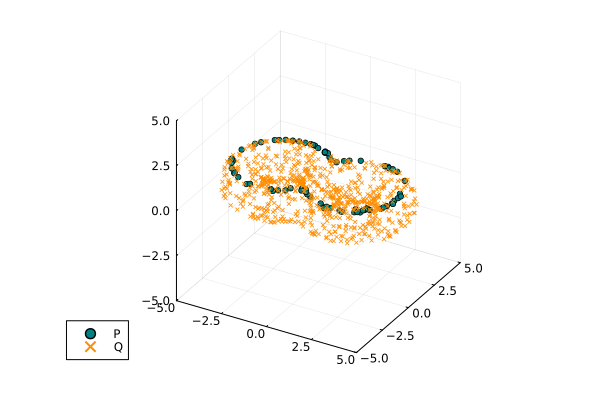

In [7]:
p = plot_3D(P, Q, Q_markersize = 2, xlim = (-5, 5), ylim = (-5, 5), zlim = (-5, 5))

In [8]:
# gather all points 
X = vcat(P, Q)

# compute distance
D = pairwise(Euclidean(), X, X, dims = 1)

# Define submatrices 
D_P = D[1:n_P, 1:n_P]
D_Q = D[n_P+1:end, n_P+1:end]
D_P_Q = D[1:n_P, n_P+1:end]
    # rows (landmarks): P1
    # columns (witness) : P2
D_Q_P = D[n_P+1:end, 1:n_P];
    # rows (landmarks): P2
    # columns (witness) : P1

In [9]:
# Compute Vietoris-Rips persistence on two regions
dim = 1
VR_P = eirene(D_P, record = "all", maxdim = dim)
VR_Q = eirene(D_Q, record = "all", maxdim = dim)

# compute Witness persistence
W_P = compute_Witness_persistence(D_P_Q, maxdim = dim);
#W_Q = compute_Witness_persistence(D_Q_P, maxdim = dim);

In [10]:
# plot all PD
barcode_VR_P = barcode(VR_P, dim = 1)
barcode_W_P = barcode(W_P["eirene_output"], dim = 1)
#barcode_W_Q = barcode(W_Q["eirene_output"], dim = 1)
barcode_VR_Q = barcode(VR_Q, dim = 1);

In [13]:
selected_Q, cutoff_Q = select_persistent_intervals_IQR(barcode_VR_Q)

([190, 193, 200, 204, 206, 207, 208, 209], 0.6974242676872978)

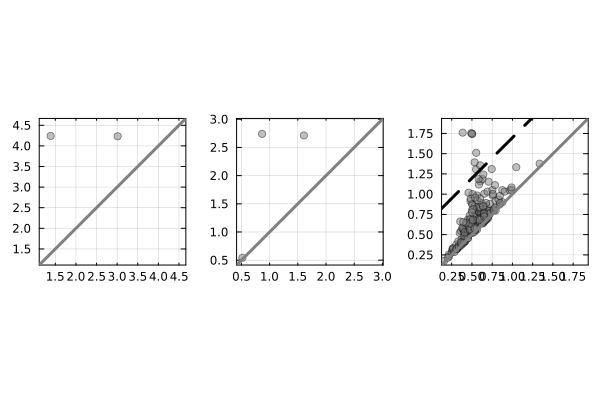

In [14]:
# plot all PD
p1 = plot_PD(barcode_VR_P)
p2 = plot_PD(barcode_W_P)
p3 = plot_PD(barcode_VR_Q, cutoff = cutoff_Q)
plot(p1, p2, p3, layout = grid(1,3))

Run similarity-centric analogous bars at birthtime of witness cycle


### On witness cycle 3

In [ ]:
extension_P, extension_Q = run_similarity_analogous_birthtime(
                                            VR_P = VR_P,
                                            D_P = D_P,
                                            VR_Q = VR_Q,
                                            D_Q = D_Q,
                                            W_PQ = W_P,
                                            W_PQ_bar = 3
                                            );

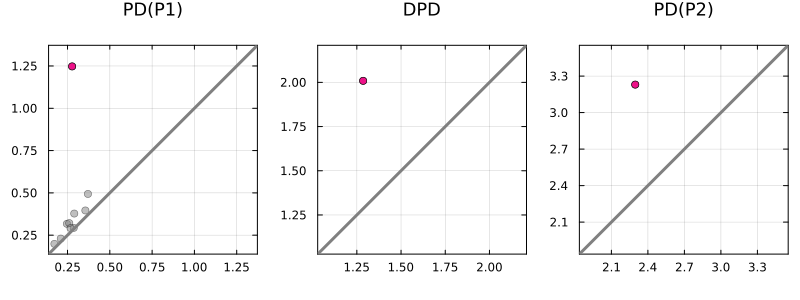

In [15]:
# plot similarity-centric analogous pairs 
# select Witness bar
witness_idx = 3

# plot all persistence diagrams & significance feature cutoff
p1 = plot_PD(barcode_VR_P; 
            highlight = extension_P["Ybar_rep_tau"],
            title = "PD(P1)", 
            titlefontsize = 12)

p2 = plot_PD(barcode_W_P; 
            highlight = [witness_idx],
            title = "DPD", 
            titlefontsize = 12)

p3 = plot_PD(barcode_VR_Q; 
            highlight = extension_Q["Ybar_rep_tau"],
            title = "PD(P2)", 
            titlefontsize = 12)

plot(p1, p2, p3, layout = grid(1,3), size = (800, 300))

In [16]:
extension_P["Ybar_rep_tau"]

1-element Vector{Int64}:
 8

In [17]:
print(extension_Q["Ybar_rep_tau"])


[1]

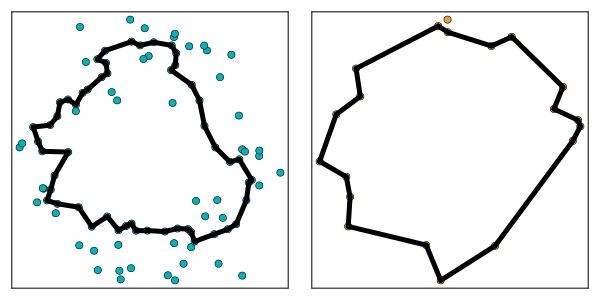

In [21]:
cr_P = get_cyclerep_Eirene(VR_P, 8)
cr_Q = get_cyclerep_Eirene(VR_Q, 1)

# plot cycles
p1 = plot_cycle_single(transpose(P), cycle = cr_P, c = "#00b4bc")
p2 = plot_cycle_single(transpose(Q), cycle = cr_Q, c = "#ee9c33")
plot(p1, p2, layout = grid(1,2), size = (600, 300))

## On Witness cycle 2